# Lid-driven cavity flow

The lid-driven cavity flow is a classic benchmark problem in computational fluid dynamics (CFD), involving incompressible viscous flow inside a square cavity. The top lid moves at a constant velocity, while the other walls are stationary, inducing a primary vortex and secondary eddies. It is widely used to validate numerical methods due to its simple geometry and complex flow features.

## Problem setup

The lid-driven cavity flow is typically defined in a unit square domain, with the following boundary and initial conditions:

- Domain: $x \in[ 0, 1 ], \; y \in[ 0, 1 ] $

- Top boundary (lid): $ u=1, \; v=0 $
 (moving rightward at constant velocity)

- Bottom and side walls: $ u=0, \; v=0 $
(no-slip, stationary walls)

- Initial condition: Often initialized with zero velocity throughout the domain.

This setup generates a primary vortex in the center and possible secondary vortices near the corners, depending on the Reynolds number.
![cavity](images/cavity.png)

The reference result for the horiontal velocity distribution along the vertical center line at the Reynolds number of 100 can be downloaded [here](./data/plot_u_y_Ghia100.csv).

## Solve problem

### Steps of the SIMPLE algorithm

1. Initialize the flow field. -->$u,v,p$
2. Solve the momentum equation.-->$u^*,v^*,$
3. Solve the pressure correction equation(continum equation).-->$p^*,$
4. Update the flow field.-->$u=u^*+u' ;\; v=v^*+v' $
5. Update the pressure field.-->$p=p^*+p'$

![Control volume](images/cavity_cv.png)

### Discretize $u$-momentum equation

$$
\frac{u \partial u} {\partial x}+\frac{v \partial u} {\partial y}=\frac{-\partial P} {\partial x}+\frac{1} {R e} ( \frac{\partial^{2} u} {\partial x^{2}}+\frac{\partial^{2} u} {\partial y^{2}} ) 
$$
Integrate in 
$$
\int_{S}^{N} \int_{W}^{E} u\frac{\partial u} {\partial x}dxdy
$$

***We consider the first $u$ as a constant*** ,so it becomes

$$
\int_{S}^{N} \left[ u|_E(\frac{u_{i,j}+u_{i,j+1}}{2}) - u|_W(\frac{u_{i,j}+u_{i,j-1}}{2}) \right]dy = \left[ \underbrace{(\frac{u_{i,j}+u_{i,j+1}}{2})}_{u|_E}(\frac{u_{i,j}+u_{i,j+1}}{2}) - \underbrace{(\frac{u_{i,j}+u_{i,j-1}}{2})}_{u|_W}(\frac{u_{i,j}+u_{i,j-1}}{2}) \right] \Delta y
$$
Similarly,
$$
\iint u \frac{\partial u}{\partial x} dx dy = \left[ u_E \left( \frac{u_{i,j} + u_{i,j+1}}{2} \right) - u_W \left( \frac{u_{i,j} + u_{i,j-1}}{2} \right) \right] \Delta y
$$

$$
\iint v \frac{\partial u}{\partial y} dx dy = \left[ v_N \left( \frac{u_{i,j} + u_{i-1,j}}{2} \right) - v_S \left( \frac{u_{i,j} + u_{i+1,j}}{2} \right) \right] \Delta x
$$

As to the diffusion part,
$$
\frac{1}{Re} \iint \frac{\partial^2 u}{\partial x^2} dx dy = \frac{1}{Re} \int \left[ \left( {\frac{\partial u} {\partial x}} \right)_{E}-\left( {\frac{\partial u} {\partial x}} \right)_{W} \right]  dy =
\frac{1}{Re} \left[ \left( \frac{u_{i,j+1} - u_{i,j}}{\Delta x} \right) - \left( \frac{u_{i,j} - u_{i,j-1}}{\Delta x} \right) \right] \Delta y
$$
and 
$$
\frac{1}{Re} \iint \frac{\partial^2 u}{\partial y^2} dx dy = \frac{1}{Re} \left[ \left( \frac{u_{i-1,j} - u_{i,j}}{\Delta y} \right) - \left( \frac{u_{i,j} - u_{i+1,j}}{\Delta y} \right) \right] \Delta x
$$

What's more, the pressure part, 

$$
\iint-\frac{\partial p} {\partial x} d x \; d y=-\Delta y ( p_{i, j+1}-p_{i, j} ) 
$$
Eventually,we reorder the discrete eqution and we can get the familar form:
$$
a_{e} \; {u}_{i j}^* \;=\; a_{E} \; {u}_{i, j+1} \;+\; a_{W} \; {u}_{i, j-1} \;+\; a_{N} {u}_{i-1,j} \;+\; a_{S} \; {u}_{i+1, j} \;+\; d_{e} \; \left( P_{i j+1}-P_{i, j} \right)

### Discretize $v$-momentum equation

Like what we have done before, just change the control volumn.

The origin equation is 
$$
\frac{v \partial v} {\partial x}+\frac{v \partial v} {\partial y}=\frac{-\partial P} {\partial y}+\frac{1} {R e} ( \frac{\partial^{2} u} {\partial x^{2}}+\frac{\partial^{2} u} {\partial y^{2}} ) 
$$
After intrgation
$$
\iint u \; {\frac{\partial v} {\partial x}} d x \; d y=\left[ u_{E} \left( {\frac{v_{i, j}+v_{i, j+1}} {2}} \right)-u_{W} \left( {\frac{v_{i, j}+v_{i, j-1}} {2}} \right) \right] \Delta y 
$$
$$
{{\iint v \, {\frac{\partial v} {\partial y}} \, d x \, d y=\left[ v_{N} \left( {\frac{v_{i, j}+v_{i-1, j}} {2}} \right)-v_{S} \left( {\frac{v_{i, j}+v_{i+1, j}} {2}} \right) \right] \Delta x}} \\ {{{\frac{1} {R e}} \iint{\frac{\partial^{2} v} {\partial x^{2}}} \, d x \, d y={\frac{1} {R e}} \left[ \left( {\frac{v_{i, j+1}-v_{i, j}} {\Delta x}} \right)-\left( {\frac{v_{i, j}-v_{i, j-1}} {\Delta x}} \right) \right] \Delta y}} \\ {{{\frac{1} {R e}} \iint{\frac{\partial^{2} v} {\partial y^{2}}} \, d x \, d y={\frac{1} {R e}} \left[ \left( {\frac{v_{i-1, j}-v_{i, j}} {\Delta y}} \right)-\left( {\frac{v_{i, j}-v_{i+1, j}} {\Delta y}} \right) \right] \Delta x}}  
$$

$$
\iint-{\frac{\partial p} {\partial y}} d x \, d y=-\Delta x ( p_{i, j}-p_{i+1, j} ) 
$$

where

$$
a_{n} v^*_{i, j}=a_{E} v_{i, j+1}+a_{W} v_{i, j-1}+a_{N} v_{i-1, j}+a_{S} v_{i+1, j}+d_{n} ( p_{i-1, j}-p_{i, j} ) 
$$
$$
a_{n}=\frac{u_{E}} {2} \Delta x-\frac{u_{W}} {2} \Delta x+\frac{v_{N}} {2} \Delta y-\frac{v_{S}} {2} \Delta y+\frac{1} {R e}+\frac{1} {R e}+\frac{1} {R e}+\frac{1} {R e} 
$$

$$
a_{E}=-\frac{u_{E}} {2} \Delta x+\frac{1} {R e} \qquad\qquad a_{W}=\frac{u_{W}} {2} \Delta x+\frac{1} {R e} \qquad\qquad a_{N}=-\frac{v_{N}} {2} \Delta y+\frac{1} {R e} \qquad a_{S}=\frac{v_{S}} {2} \Delta y+\frac{1} {R e} \qquad d_{n}=-\frac{\Delta x} {a_{n}} 
$$

### Velocity and pressure corrections

Correct the velocity and the pressure to fulfill the continuum equation.

$$
\frac{\partial u} {\partial x} \,+\, \frac{\partial v} {\partial y} \,=\, 0 
$$
$$u_e = u_e^*+d_e(p'_{i,j+1}-p'_{i,j})$$
$$u_w = u_w^*+d_w(p'_{i,j}-p'_{i,j-1})$$
$$v_n = v_n^*+d_n(p'_{i-1,j}-p'_{i,j})$$
$$v_s = v_s^*+d_s(p'_{i,j}-p'_{i+1,j})$$
Integrate
$$
{\iint\frac{\partial u} {\partial x} d x d y}  +\iint\frac{\partial v} {\partial y} d x d y=0 
$$

$$
( u_e-u_w ) \Delta y+( v_n-v_s ) \Delta x=0 
$$
Then we take the specific data into above equation, 
$$
a_{P} p^{\prime} {}_{i, j}=a_{E} p^{\prime} {}_{i, j+1}+a_{W} p^{\prime} {}_{i, j-1}+a_{N} p^{\prime} {}_{i-1, j}+a_{S} p^{\prime} {}_{i+1, j}+b 
$$
where
$$
a_{P}=-d_{e} \Delta y-d_{w} \Delta y-d_{n} \Delta x-d_{s} \Delta x 
$$
$$
b=-\big( u^*_{i, j}-u^*_{i, j-1} \big) \Delta y+( v^*_{i, j}-v^*_{i-1, j} ) \Delta x 
$$
$$
a_{E}=-d_{e} \Delta y \qquad\qquad a_{W}=-d_{w} \Delta y \qquad\qquad a_{N}=-d_{n} \Delta y \qquad\qquad a_{S}=-d_{s} \Delta y 
$$
We can get $p'$, and from the momentum equation we can get $$p=p^* + p'$$ and 
$$u_e = u_e^*+d_e(p'_{i,j+1}-p'_{i,j})$$
$$u_w = u_w^*+d_w(p'_{i,j}-p'_{i,j-1})$$
$$v_n = v_n^*+d_n(p'_{i-1,j}-p'_{i,j})$$
$$v_s = v_s^*+d_s(p'_{i,j}-p'_{i+1,j})$$

### Solve algebraic equations (SIMPLE)

In [13]:
# 1. Defining the problem domain
import numpy as np
import matplotlib.pyplot as plt

n_points = 31  # Number of points in each direction
dom_length = 1.0
h = dom_length / (n_points - 1)

# Create the domain grid
x = np.linspace(0, dom_length, n_points)
y = np.linspace(0, dom_length, n_points)

# Fluid and simulation properties
Re = 100.0  # Reynolds number
nu = 1.0 / Re

# Under-relaxation factors for stability
alpha = 0.8
alpha_p = 0.8

# Convergence criteria
error_req = 1e-6

In [14]:
# 2. Initializing the variables

# Final collocated variables (for post-processing)
u_final = np.zeros((n_points, n_points))
v_final = np.zeros_like(u_final)
p_final = np.ones_like(u_final)
u_final[0, :] = 1.0 # Lid velocity

# Staggered grid variables
# Note: index starts form 0
u = np.zeros((n_points + 1, n_points))
u_star = np.zeros_like(u)
d_e = np.zeros_like(u)

v = np.zeros((n_points, n_points + 1))
v_star = np.zeros_like(v)
d_n = np.zeros_like(v)

p = np.ones((n_points + 1, n_points + 1))
p_star = np.ones_like(p)
pc = np.zeros_like(p)
b = np.zeros_like(p)

# Think carefully about why we set u=2
u[0, :] = 2.0

u_new = np.zeros_like(u)
v_new = np.zeros_like(v)
p_new = np.ones_like(p)
u_new[0, :] = 2.0

In [15]:
# 3. Solving the governing equations
error = 1.0
iterations = 0
error_req = 1e-5

# Main solver loop
while error > error_req:
    # X‑momentum interior
    for i in range(1, n_points):
        for j in range(1, n_points - 1):
            u_E = 0.5 * (u[i, j]   + u[i, j+1])
            u_W = 0.5 * (u[i, j]   + u[i, j-1])
            v_N = 0.5 * (v[i-1, j] + v[i-1, j+1])
            v_S = 0.5 * (v[i, j]   + v[i, j+1])

            a_E = -0.5*u_E*h + nu
            a_W = 0.5*u_W*h  + nu
            a_N = -0.5*v_N*h + nu
            a_S = 0.5*v_S*h  + nu

            a_e = (0.5*u_E*h - 0.5*u_W*h +
                   0.5*v_N*h - 0.5*v_S*h + 4*nu)
            d_e[i, j] = -h / a_e

            u_star[i, j] = ((a_E*u[i, j+1] + a_W*u[i, j-1] +
                              a_N*u[i-1, j] + a_S*u[i+1, j]) / a_e
                              + d_e[i, j] * (p[i, j+1] - p[i, j]))

    # X‑momentum boundary
    u_star[0, :]    = 2.0 - u_star[1, :]
    u_star[-1, :]   = -u_star[-2, :]
    u_star[1:-1, 0] = 0.0
    u_star[1:-1,-1] = 0.0

    # Y‑momentum interior
    for i in range(1, n_points - 1):
        for j in range(1, n_points):
            u_E = 0.5*(u[i, j] + u[i+1, j])
            u_W = 0.5*(u[i, j-1] + u[i+1, j-1])
            v_N = 0.5*(v[i-1, j] + v[i, j])
            v_S = 0.5*(v[i, j]   + v[i+1, j])

            a_E = -0.5*u_E*h + nu
            a_W = 0.5*u_W*h  + nu
            a_N = -0.5*v_N*h + nu
            a_S = 0.5*v_S*h  + nu

            a_n = (0.5*u_E*h - 0.5*u_W*h +
                   0.5*v_N*h - 0.5*v_S*h + 4*nu)
            d_n[i, j] = -h / a_n

            v_star[i, j] = ((a_E*v[i, j+1] + a_W*v[i, j-1] +
                              a_N*v[i-1, j] + a_S*v[i+1, j]) / a_n
                              + d_n[i, j] * (p[i, j] - p[i+1, j]))

    # Y‑momentum boundary
    v_star[:, 0]    = -v_star[:, 1]
    v_star[:, -1]   = -v_star[:, -2]
    v_star[0, 1:-1] = 0.0
    v_star[-1,1:-1] = 0.0

    # Pressure correction
    pc.fill(0.0)
    for i in range(1, n_points):
        for j in range(1, n_points):
            a_E = -d_e[i, j]   * h
            a_W = -d_e[i, j-1] * h
            a_N = -d_n[i-1, j] * h
            a_S = -d_n[i, j]   * h
            a_P = a_E + a_W + a_N + a_S

            b[i, j] = -(u_star[i, j] - u_star[i, j-1])*h + \
                      (v_star[i, j] - v_star[i-1, j])*h

            pc[i, j] = ((a_E * pc[i, j+1] + a_W * pc[i, j-1] +
                         a_N * pc[i-1, j] + a_S * pc[i+1, j] +
                         b[i, j]) / a_P)

    # Update pressure with under-relaxation
    p_new[1:-1,1:-1] = p[1:-1,1:-1] + alpha_p * pc[1:-1,1:-1]
    p_new[0, :]      = p_new[1, :]
    p_new[-1, :]     = p_new[-2, :]
    p_new[:, 0]      = p_new[:, 1]
    p_new[:, -1]     = p_new[:, -2]

    # Correct velocities
    for i in range(1, n_points):
        for j in range(1, n_points - 1):
            u_new[i, j] = (u_star[i, j] +
                           alpha * d_e[i, j] * (pc[i, j+1] - pc[i, j]))
    u_new[0, :]    = 2.0 - u_new[1, :]
    u_new[-1, :]   = -u_new[-2, :]
    u_new[1:-1, 0] = 0.0
    u_new[1:-1,-1] = 0.0

    for i in range(1, n_points - 1):
        for j in range(1, n_points):
            v_new[i, j] = (v_star[i, j] +
                           alpha * d_n[i, j] * (pc[i, j] - pc[i+1, j]))
    v_new[:, 0]    = -v_new[:, 1]
    v_new[:, -1]   = -v_new[:, -2]
    v_new[0, 1:-1] = 0.0
    v_new[-1,1:-1] = 0.0

    # Compute residual error
    error = np.sum(np.abs(b[1:-1, 1:-1]))

    u[:] = u_new
    v[:] = v_new
    p[:] = p_new
    iterations += 1

print(f"\nConvergence achieved after {iterations} iterations with a final error of {error:.4e}")


Convergence achieved after 1115 iterations with a final error of 9.7924e-06


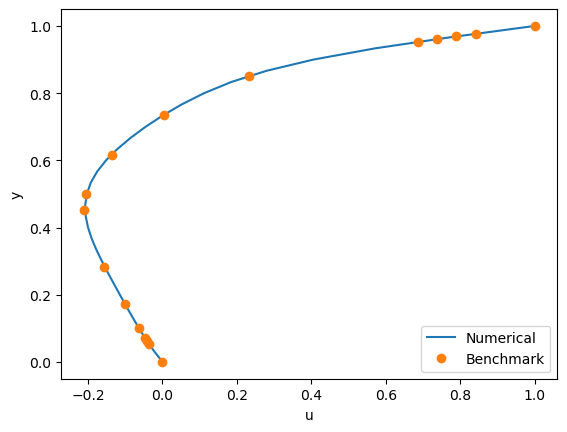

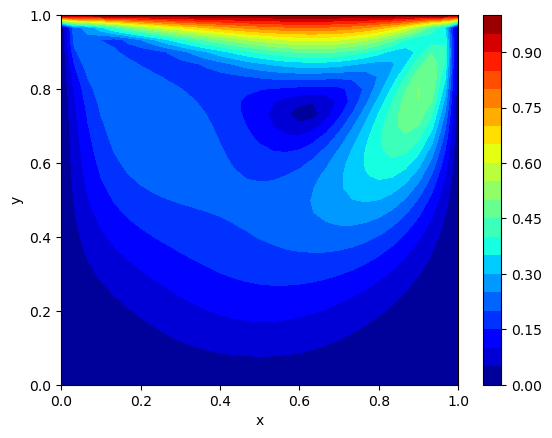

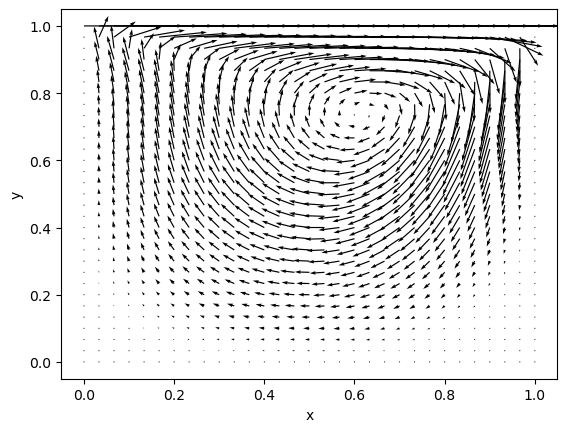

In [16]:
# 4. Map staggered variables to collocated grid for plotting
for i in range(n_points):
    for j in range(n_points):
        u_final[i, j] = 0.5 * (u[i, j] + u[i+1, j])
        v_final[i, j] = 0.5 * (v[i, j] + v[i, j+1])
        p_final[i, j] = 0.25 * (p[i, j] + p[i+1, j] +
                                p[i, j+1] + p[i+1, j+1])

# --- Plotting the results ---
import pandas as pd

plt.figure()
plt.plot(u_final[:, n_points//2], 1 - y, label='Numerical')
ghia = pd.read_csv('data/plot_u_y_Ghia100.csv', skiprows=1, header=None).values
y_ghia, u_ghia = ghia[:,0], ghia[:,1]
plt.plot(u_ghia, y_ghia, 'o', label='Benchmark')
plt.xlabel('u'); plt.ylabel('y')
plt.legend(loc='lower right')

# === Contour and vector plots ===
x_dom = np.arange(n_points) * h
y_dom = 1.0 - np.arange(n_points) * h
X, Y = np.meshgrid(x_dom, y_dom)

plt.figure()
plt.contourf(X, Y, np.sqrt(u_final**2 + v_final**2), levels=21, cmap='jet')
plt.colorbar()
plt.xlabel('x'); plt.ylabel('y')

plt.figure()
plt.quiver(X, Y, u_final, v_final, scale=5, color='k')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

## Exercise

1. Simulate the lid-driven cavity flow at higher Reynolds numbers. Improve the code if instabilities are encountered.

2. Compare the calculated results with the published data regarding the velocity profiles and the vortices.

3. Investigate the stability of the numerical results and the grid resolution.